# TalTech'i programmeerimise ainete Discordi tekstide anal√º√ºs

#### Sisukord:
- Korpuse kirjeldus
- Andmete hankimine
- Andmete t√∂√∂tlemine
- Kasutatud meetodid
- Teksti parsimine
- Erinevad parsimise konfiguratsioonid
- Kvantitatiivsed m√µ√µtmed
- TextRank anal√ºsaator
- Teemade klassifitseerimine

#### Korpuse kirjeldus 2020. detsembri seisuga:
- Korpuses on nelja semestri jagu tekste, kus on 2 P√º√ºtoni algkursuse ning 2 Java p√µhikursuse serverit, mida kasutatakse √µppet√∂√∂ l√§bi viimiseks.
- Serveris on umbes v√§hemalt 30 √ºlesande kanalit, 10 informatiivset kanalit ning 10 fun kanalit.
- N√§dalas pannakse √ºles v√§hemalt 2 √ºlesannet. Kokku on n√§dalaid v√§hemalt 15.
- Kood on lastud l√§bi anal√ºsaatori: https://github.com/envomp/valence-analyzer
- Korpuses on ligikaudu 3 miljonit s√µna.

#### Andmete hankimine:
- Andmete hankeks kasutati Discordi avalikku API peale kirjutatud .net wrapperit, mida jooksutasin docker konteineris ja mountisin failis√ºsteemis √µigesse kohta 
- Kood ning andmete struktuur on kirjeldatud: https://github.com/envomp/discord-data-fetcher 

#### Andmete t√∂√∂tlemine:
- Andmed on t√∂√∂deldud CachedRunneri abil, millele saab sisestada konfiguratsiooni.
- CountConfiguration, mis loeb kokku s√µnade kordused ning teksti alatooni emotsioonid.
- ConcatConfiguration, mis muudab teksti JSON formaadist string kujule.
- Lisaks on kirjutatud TextRank anal√ºsaator ning Kvantitatiivsete m√µ√µdikute eraldaja.
- Koodid on saadaval: https://github.com/envomp/discord-data-aggregator/tree/master/notebook

#### Kasutatud meetodid:
- API requestide abil kanalite sisu hankimine
- Andmete eelt√∂√∂tlemine (algt√ºve v√µtmine, s√µnade filtreerimine)
- Meelsusanal√º√ºs
- Kvantitatiivsed m√µ√µdikud (loetavus, ametlikkus ja informatiivsus)
- V√µtmes√µnade ekstrahheerimine
- Sisukokkuv√µtete genereerimine
- V√µtmes√µnade ning sisukokkuv√µtete klasterdamine (TF-IDF)

#### CachedRunner
CachedRunner kasutab antud konfiguratsiooni, et andmed √§ra t√∂√∂delda ning Pandas andmestruktuurina tagastada. Nagu ka nimi √ºtleb, et vastused salvestatakse √§ra, et j√§rgmine kord on nende andmete p√§rimine kiirem. CachedRunner tagastab sama andmestiku mitme erineva grupeeringuga:
- aastati
- √ºlesanneti
- √ºlesannete grupeeringuti
- k√µik eraldi
- k√µik koos

In [23]:
%%capture
%load_ext autoreload
%autoreload 2
from concat_configuration import ConcatConfiguration
from count_configuration import CountConfiguration
from textrank_analyzer import TextRankAnalyzer
from quantitative_metrics import QuantitativeMetrics
from cached_runner import CachedRunner
from IPython.display import display
import pandas as pd

#### CountConfiguration

CountConfiguration loeb kokku s√µnade kordused ning teksti emotsionaalse alatooni

In [2]:
%%capture
count_configuration = CountConfiguration()
count_runner = CachedRunner(count_configuration)
count_matrixes = count_runner.get_datasets(fresh=False, filter_function=count_configuration.all_words_have_context)

count_all = count_matrixes[0]
count_group_year = count_matrixes[1]
count_year_channels = count_matrixes[2]
count_flat = count_matrixes[3]
count_group_category = count_matrixes[4]

In [3]:
display(count_all)

group                                      group_members total_words in_a_row                                      count_0 repetitions_0                                      count_1 repetitions_1                     count_2 repetitions_2                       count_3 repetitions_3                     count_4 repetitions_4                       count_5 repetitions_5                          count_6 repetitions_6                      count_7 repetitions_7                   count_8 repetitions_8                      count_9 repetitions_9 valence_only_negative valence_mostly_negative valence_only_neutral valence_mostly_neutral valence_only_mixed valence_mostly_mixed valence_only_positive valence_mostly_positive
0   all  ['EX / ex01-id-code', 'EX / ex02-cpu', 'EX / e...     3175069        1                                         mina         80840                                        https          6513                       kadri          5842                          test          5239                        kord          4885                      √ºlesanne          4623                             list          3613                         kood          3371                     aasta          3302                         √µige          2911               1625447                   29681               746658                  38954                  0               125232                587919                   20364
1   all  ['EX / ex01-id-code', 'EX / ex02-cpu', 'EX / e...     3175069        2                            sebastian s√µeruer          1536                               tere hommikune           926               eelmine aasta           507                     mina kood           394              j√§rgmine n√§dal           272                j√§rgmine aasta           250                    j√§rgmine kord           182                  √µige vastus           174                 mina hetk           161                  tere hommik           159               1625447                   29681               746658                  38954                  0               125232                587919                   20364
2   all  ['EX / ex01-id-code', 'EX / ex02-cpu', 'EX / e...     3175069        3       blacklargesquare |||| blacklargesquare            34                   |||| blacklargesquare ||||            25      sebastian s√µeruer mina            23            mina eelmine aasta            22          blank line require            20            faile with message            19               testing faile with            19               mina kood pilk            18   require between summary            17         between summary line            17               1625447                   29681               746658                  38954                  0               125232                587919                   20364
3   all  ['EX / ex01-id-code', 'EX / ex02-cpu', 'EX / e...     3175069        4  |||| blacklargesquare |||| blacklargesquare            25  blacklargesquare |||| blacklargesquare ||||            25  testing faile with message            19  require between summary line            17  blank line require between            17  line require between summary            17  maximum recursion depth exceede            15  code contains scenario that             9  cannot find symbo symbol             9  your code contains scenario             9               1625447                   29681               746658                  38954                  0               125232                587919                   20364

#### Hinnang: 
- Osad inimesed on v√§ga aktiivsed, et nende nimed on isegi top s√µnade ning fraaside hulgas.
- Tihti esinevad vead on ka n√§htaval, mis t√§hendab, et programmeerimisest r√§√§gitakse palju.
- V√§ga palju r√§√§gitakse eelmistest ning j√§rgmistest perioodidest. 

In [33]:
display(count_group_year.loc[count_group_year['in_a_row'] == 1])

group                                      group_members total_words in_a_row count_0 repetitions_0   count_1 repetitions_1   count_2 repetitions_2 count_3 repetitions_3     count_4 repetitions_4 count_5 repetitions_5 count_6 repetitions_6     count_7 repetitions_7 count_8 repetitions_8 count_9 repetitions_9 valence_only_negative valence_mostly_negative valence_only_neutral valence_mostly_neutral valence_only_mixed valence_mostly_mixed valence_only_positive valence_mostly_positive
4     Java 2020  ['ex / ex01-idcode', 'ex / ex02-webbrowser', '...       59749        1    mina          1199      test           270  √ºlesanne           230   https           146        java           121    kood           118   punkt           114      meetod           113    kord           107   n√§dal           107                 24813                    1067                16879                   1487                  0                 3850                 10767                     883
12  Python 2020  ['EX / ex01_cashier', 'EX / ex02_cypher', 'EX ...      517998        1    mina         11320  √ºlesanne          1987      list          1452    test          1325  funktsioon          1251   https          1163    kord          1124        kood          1057    viga           940   n√§ide           801                215392                   11683               132377                  13318                  0                46288                 90587                    8260
0     java 2019  ['EX / ex01-id-code', 'EX / ex02-cpu', 'EX / e...     1841005        1    mina         52862     kadri          4730     https          4112    kord          2318       aasta          2230    tere          2099   piret          2021   sebastian          2005    laps          1991    p√§ev          1949               1052423                    6698               398508                   5217                  0                23791                350638                    3186
8   python 2019  ['EX / ex01', 'EX / ex02', 'EX / ex03_idcode',...      756317        1    mina         15459      test          2259  √ºlesanne          1500    list          1471       faile          1377    kord          1336    kood          1187  funktsioon          1176   https          1092   kadri           944                332819                   10233               198894                  18932                  0                51303                135927                    8035

#### Hinnang: 
- Java 2019 kanal on ebaproportsionaalselt suur ning Java 2020 on ebaproportsionaalselt v√§ika. 2019 aasta kanalis on endiselt aktiivne arutelu mitte programmeerimise teemadel, ning seet√µttu ka nimesi palju seal 

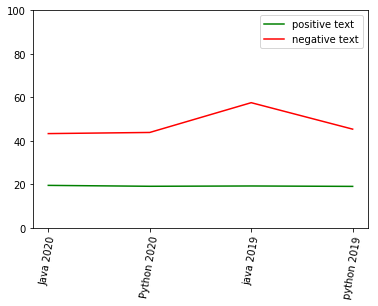

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def get_axis_for_emotion(emotion, df):
    groups = set()
    x = []
    y = []
    for index, row in df.iterrows():
        if row["group"] not in groups:
            groups.add(row["group"])
            y.append(100 * (row["valence_only_" + emotion] + row["valence_mostly_" + emotion]) / max(1, row["total_words"]))
            x.append(row["group"])
    return x, y

x1, y1 = get_axis_for_emotion("positive", count_group_year)
plt.plot(x1, y1, "g", label='positive text')

x2, y2 = get_axis_for_emotion("negative", count_group_year)
plt.plot(x2, y2, "r", label='negative text')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, 0, 100))
plt.xticks(rotation=80)
plt.legend()

#### Hinnang: 
- Kuna Java 2019 aasta kanalis r√§√§gitakse muudel teemadel, siis on ka negatiivse alatooniga tekstide suurus erinev

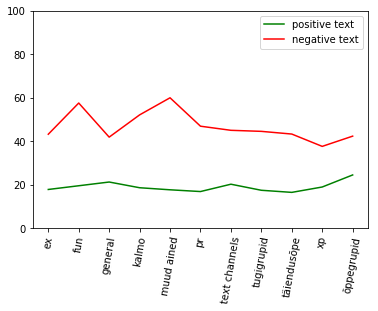

In [5]:
%matplotlib inline
x1, y1 = get_axis_for_emotion("positive", count_group_category)
plt.plot(x1, y1, "g", label='positive text')

x2, y2 = get_axis_for_emotion("negative", count_group_category)
plt.plot(x2, y2, "r", label='negative text')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, 0, 100))
plt.xticks(rotation=80)
plt.legend()

#### Hinnang: 
- √ïppegruppide kanalites on k√µige rohkem positiivse alatooniga teksti
- Muude ainete ning fun kanalites on k√µige rohkem negatiivse alatoniga teksti (nagu ka 2019 aasta java serveris)
- Programmeerimine j√§tab v√§hem halva enesetunde v√µrreldes kanalites muude tegevustega

<IPython.core.display.Javascript object>


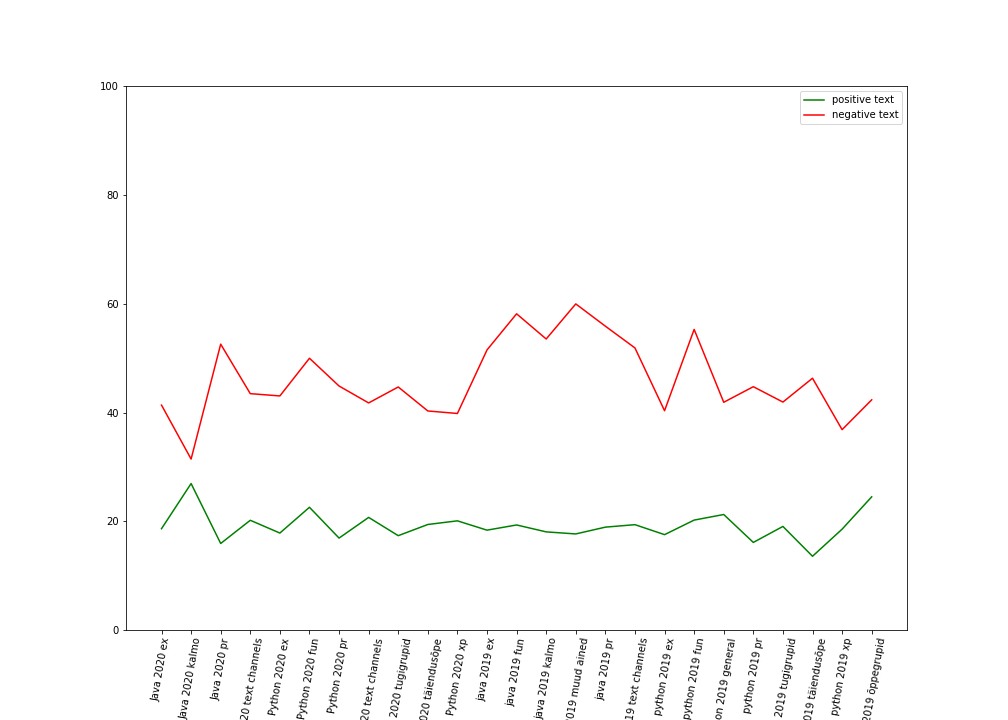

In [14]:
%matplotlib notebook
x1, y1 = get_axis_for_emotion("positive", count_year_channels)
plt.plot(x1, y1, "g", label='positive text')

x2, y2 = get_axis_for_emotion("negative", count_year_channels)
plt.plot(x2, y2, "r", label='negative text')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, 0, 100))
plt.xticks(rotation=80)
plt.legend()
plt.rcParams["figure.figsize"]=14,10

#### Hinnang: 
- Java 2020 Kalmo kanalites on rohkem positiivse alatooniga teksti
- Python 2019 √µppegruppide kanalites on samuti palju positiivse alatooniga teksti
- S√ºvap√º√ºtoni √ºlesanded j√§tavad tudengid emotsionaalselt k√ºlmaks
- Fun kanalid on l√§bivalt suhteliselt negatiivse alatooniga
- Python 2019 t√§iendus√µpe polnud positiivne kogemus

<IPython.core.display.Javascript object>


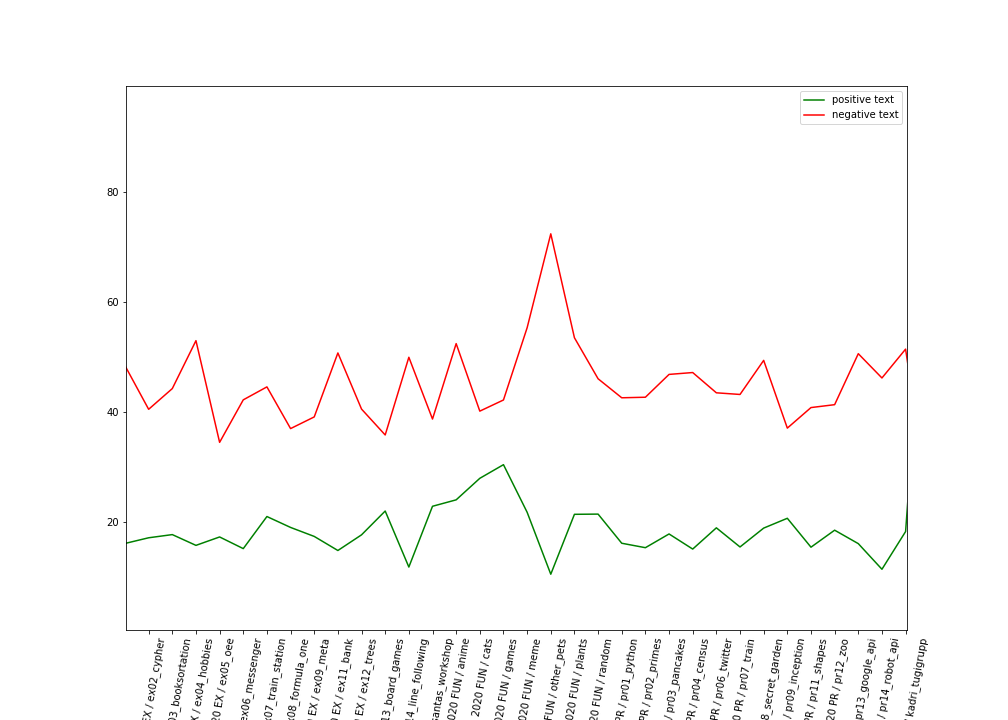

In [31]:
%matplotlib notebook
x1, y1 = get_axis_for_emotion("positive", count_flat)
plt.plot(x1, y1, "g", label='positive text')

x2, y2 = get_axis_for_emotion("negative", count_flat)
plt.plot(x2, y2, "r", label='negative text')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, 0, 100))
plt.xticks(rotation=80)
plt.legend()
plt.rcParams["figure.figsize"]=14,10

#### Hinnang: 
- Mingil p√µhjusel other_pets kanalis on v√§ga palju negatiivse alatooniga teksti
- Emoji'sid pole arvesse v√µetud
- √úlesannetest ex14, ex11 ning ex04 olid k√µige negatiivsema alatooniga kanalid
- √úlesannetest ex07, ex13 ja ex15 olid k√µige positiivsema alatooniga kanalid

#### ConcatConfiguration

ConcatConfiguration paneb kokku s√µnumid, et saaks teisi anal√ºsaatoreid kasutada

In [7]:
%%capture
concat_configuration = ConcatConfiguration()
concat_runner = CachedRunner(concat_configuration)
concat_matrixes = concat_runner.get_datasets(fresh=False)

concat_all = concat_matrixes[0]
concat_year = concat_matrixes[1]
concat_year_channels = concat_matrixes[2]
concat_flat = concat_matrixes[3]
concat_group_category = concat_matrixes[4]

#### QuantitativeMetrics
QuantitativeMetrics hindab sisendteksti:
- loetavust
- keerukust
- tihedust
- formaalsust

In [8]:
quantitative_metrics_table = QuantitativeMetrics().analyze(concat_year_channels)

In [9]:
display(quantitative_metrics_table)

group   fres  gunning_fog  lexical_density  formality
0                Java 2020 ex  53.69        15.32            41.30      38.91
1             Java 2020 kalmo  49.30        15.90            42.90      40.87
2                Java 2020 pr  54.67        14.75            40.27      40.14
3     Java 2020 text channels  54.97        14.62            41.23      39.09
4              Python 2020 ex  55.09        14.71            41.55      39.34
5             Python 2020 fun  57.83        14.71            38.52      39.45
6              Python 2020 pr  58.13        13.88            40.64      38.80
7   Python 2020 text channels  58.05        13.73            41.56      39.09
8      Python 2020 tugigrupid  59.40        13.80            40.64      39.84
9     Python 2020 t√§iendus√µpe  60.21        12.99            39.46      37.15
10             Python 2020 xp  53.66        15.13            41.78      37.35
11               java 2019 ex  60.53        13.20            39.77      36.58
12              java 2019 fun  62.41        11.24            40.58      35.61
13            java 2019 kalmo  62.18        11.91            40.71      36.35
14       java 2019 muud ained  56.23        12.30            40.40      36.91
15               java 2019 pr  62.16        12.63            39.08      35.79
16    java 2019 text channels  63.71        11.77            38.72      33.71
17             python 2019 ex  57.80        13.84            39.82      42.26
18            python 2019 fun  62.66        11.59            40.50      37.37
19        python 2019 general  55.88        14.02            41.48      37.45
20             python 2019 pr  57.88        13.65            40.16      40.93
21     python 2019 tugigrupid  62.40        11.29            37.99      36.12
22    python 2019 t√§iendus√µpe  61.43        12.71            38.84      38.40
23             python 2019 xp  58.34        13.81            39.03      39.20
24     python 2019 √µppegrupid  56.23        13.97            40.98      36.32

In [24]:
quantitative_metrics_table_flat = QuantitativeMetrics().analyze(concat_flat)

<IPython.core.display.Javascript object>


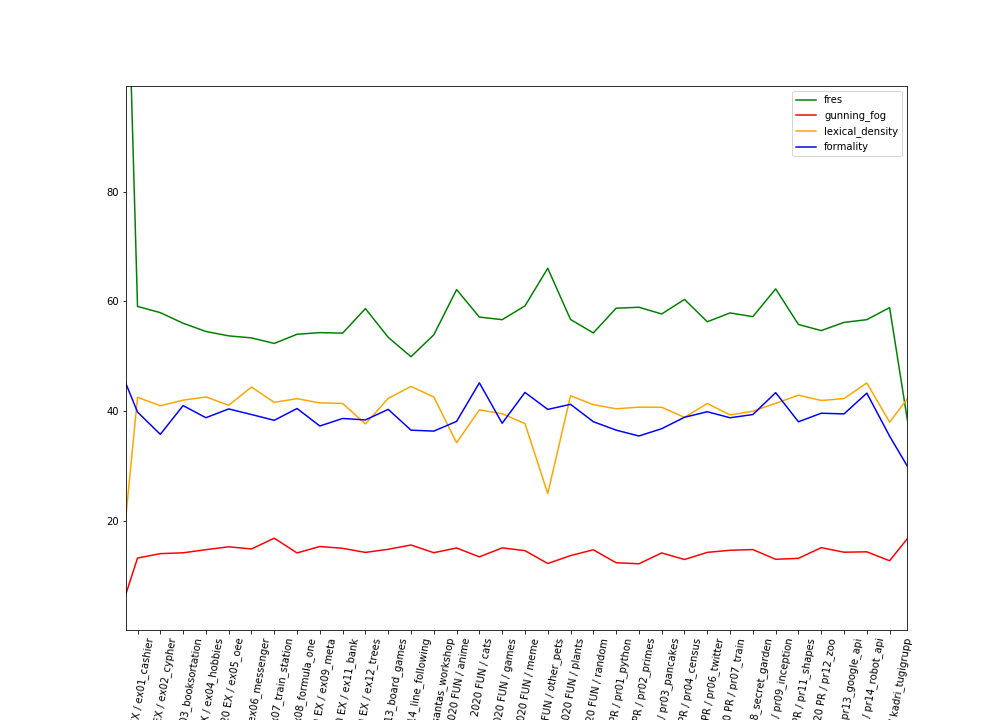

In [30]:
%matplotlib notebook
x = quantitative_metrics_table_flat["group"]
y1 = quantitative_metrics_table_flat["fres"]
y2 = quantitative_metrics_table_flat["gunning_fog"]
y3 = quantitative_metrics_table_flat["lexical_density"]
y4 = quantitative_metrics_table_flat["formality"]

# 100 on loetav
plt.plot(x, y1, "g", label='fres')

# 100 on keeruline
plt.plot(x, y2, "r", label='gunning_fog')

# 100 on tihe
plt.plot(x, y3, "orange", label='lexical_density')

# 100 on formaalne
plt.plot(x, y4, "b", label='formality')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, 0, 100))
plt.xticks(rotation=80)
plt.legend()
plt.rcParams["figure.figsize"]=14,10

#### Hinnang: 

FRES
 - loomade kanalid on loetavad
 - PR √ºlesannetest PR09 ning PR04 olid loetavad
 - EX √ºlesannetest EX12 oli loetav ning EX14 oli v√§he loetav

Gunning FOG
 - K√µik √ºlesande kanalid olid sama suure keerukusega

Leksikaalne tihedus
 - other_pets kanal on v√§ga h√µre
 - teised kanalid on aga suuresti sama tihedad

Formaalsus
 - cats, PR09 ning PR14 kanalid on k√µige formaalsemad kanalid

In [10]:
import numpy as np
import itertools

matrix = [
    ("FRES", quantitative_metrics_table["fres"]),
    ("GFOG", quantitative_metrics_table["gunning_fog"]),
    ("Density", quantitative_metrics_table["lexical_density"]),
    ("Formality", quantitative_metrics_table["formality"])
]

print("Correlations between:")
for (name1, list1), (name2, list2) in itertools.product(matrix, repeat = 2):
    print(name1 + " and " + name2 + " are " + str(abs(round(np.corrcoef(list1, list2)[0, 1], 2))))

Correlations between:
FRES and FRES are 1.0
FRES and GFOG are 0.89
FRES and Density are 0.71
FRES and Formality are 0.59
GFOG and FRES are 0.89
GFOG and GFOG are 1.0
GFOG and Density are 0.55
GFOG and Formality are 0.67
Density and FRES are 0.71
Density and GFOG are 0.55
Density and Density are 1.0
Density and Formality are 0.3
Formality and FRES are 0.59
Formality and GFOG are 0.67
Formality and Density are 0.3
Formality and Formality are 1.0


#### Hinnang: 
- Meetrikad on suuresti korrelatsioonis v.a teksti tihedus ja formaalsus

#### TextRankAnalyzer
TextRankAnalyzer ekstrahheerib v√µtmes√µnad ning sisukokkuv√µtted

In [11]:
textrank_table = TextRankAnalyzer().analyze(concat_flat)

In [12]:
pd.set_option('display.max_colwidth', -1)
display(textrank_table)
pd.reset_option('display.max_colwidth')

group                                         group_members  \
0    Java 2020 Kalmo / java                            ['Java 2020 Kalmo / java']                             
1    Java 2020 PR / pr01-introduction                  ['Java 2020 PR / pr01-introduction']                   
2    Java 2020 PR / pr02-datastructures                ['Java 2020 PR / pr02-datastructures']                 
3    Java 2020 PR / pr03-datatypes                     ['Java 2020 PR / pr03-datatypes']                      
4    Java 2020 PR / pr04-subclasses                    ['Java 2020 PR / pr04-subclasses']                     
5    Java 2020 PR / pr06-reading-files                 ['Java 2020 PR / pr06-reading-files']                  
6    Java 2020 PR / pr07-stream                        ['Java 2020 PR / pr07-stream']                         
7    Java 2020 PR / pr08-steakhouse                    ['Java 2020 PR / pr08-steakhouse']                     
8    Java 2020 PR / pr09-greenhouse                    ['Java 2020 PR / pr09-greenhouse']                     
9    Java 2020 PR / pr10-recursion                     ['Java 2020 PR / pr10-recursion']                      
10   Java 2020 PR / pr11-cakeorder                     ['Java 2020 PR / pr11-cakeorder']                      
11   Java 2020 PR / pr12-generics                      ['Java 2020 PR / pr12-generics']                       
12   Java 2020 PR / pr13-singleton                     ['Java 2020 PR / pr13-singleton']                      
13   Java 2020 PR / pr14-lambda                        ['Java 2020 PR / pr14-lambda']                         
14   Java 2020 Text Channels / food                    ['Java 2020 Text Channels / food']                     
15   Java 2020 Text Channels / gomoku                  ['Java 2020 Text Channels / gomoku']                   
16   Java 2020 Text Channels / logo                    ['Java 2020 Text Channels / logo']                     
17   Java 2020 Text Channels / meme                    ['Java 2020 Text Channels / meme']                     
18   Java 2020 Text Channels / projekt                 ['Java 2020 Text Channels / projekt']                  
19   Java 2020 Text Channels / random                  ['Java 2020 Text Channels / random']                   
20   Java 2020 Text Channels / robocode                ['Java 2020 Text Channels / robocode']                 
21   Java 2020 Text Channels / teated                  ['Java 2020 Text Channels / teated']                   
22   Java 2020 ex / ex01-idcode                        ['Java 2020 ex / ex01-idcode']                         
23   Java 2020 ex / ex02-webbrowser                    ['Java 2020 ex / ex02-webbrowser']                     
24   Java 2020 ex / ex03-warehouses                    ['Java 2020 ex / ex03-warehouses']                     
25   Java 2020 ex / ex04-bonuscards                    ['Java 2020 ex / ex04-bonuscards']                     
26   Java 2020 ex / ex05-carwash                       ['Java 2020 ex / ex05-carwash']                        
27   Java 2020 ex / ex06-logfiles                      ['Java 2020 ex / ex06-logfiles']                       
28   Java 2020 ex / ex07-personstatistics              ['Java 2020 ex / ex07-personstatistics']               
29   Java 2020 ex / ex08-bordercontrol                 ['Java 2020 ex / ex08-bordercontrol']                  
30   Java 2020 ex / ex09-typegame                      ['Java 2020 ex / ex09-typegame']                       
31   Java 2020 ex / ex10-sum100                        ['Java 2020 ex / ex10-sum100']                         
32   Java 2020 ex / ex11-kittenshelter                 ['Java 2020 ex / ex11-kittenshelter']                  
33   Java 2020 ex / ex12-burgerbooth                   ['Java 2020 ex / ex12-burgerbooth']                    
34   Java 2020 ex / ex13-bar                           ['Java 2020 ex / ex13-bar']                            
35   Java 2020 ex / ex14-webscraping                

#### Hinnang: 
- √úldiselt nende √ºlesannete kanalites v√µtmes√µnad viitavad √ºlesande sisule (seal √µpetatavatele teemadele), sest tudengid k√ºsivad nende kohta k√ºsimusi ja saavad vastuseid
- V√µtmes√µnad, mis viitavad √ºlesande teemale/tekstile on ka esile toodud
- Sisukokkuv√µtted v√µtavad √ºllatavalt h√§sti kanali kokku

#### TfidfVectorizer
TfidfVectorizer klasterdab tekstid ning tagastab tihti koosesinevad s√µnad

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


def print_keywords_per_cluster(k, documents):
    stop_words = set(['a', 'abil', 'aegu', 'aga', 'ainult', 'alalt', 'alates', 'alati', 'all', 'alla', 'alles', 'alt', 'asemel', 'b', 'c', 'd', 'e', 'eales', 'ealeski', 'edasi', 'eelmine', 'eemal', 'ees', 'eest', 'ega', 'ehk', 'ehkki', 'ei', 'emb-kumb', 'enam', 'end', 'enda', 'endine', 'enese', 'enim', 'enne', 'ennem', 'ent', 'esimene', 'esimest', 'et', 'etem', 'ette', 'f', 'g', 'h', 'halb', 'halvasti', 'halvim', 'hea', 'hiljem', 'hoopis', 'hulga', 'hulgas', 'hulk', 'h√§sti', 'i', 'iga', 'igal', 'igamees', 'iganes', 'igavesti', 'iga√ºks', 'iial', 'iialgi', 'ikka', 'ilma', 'ilmaski', 'ise', 'iseenda', 'iseenese', 'isegi', 'j', 'ja', 'jooksul', 'ju', 'juba', 'juhul', 'just', 'justkui', 'juures', 'j√§relikult', 'j√§rgi', 'j√§rgmine', 'k', 'ka', 'kahe', 'kaheksa', 'kaheksandat', 'kaheksat', 'kahte', 'kaks', 'kallal', 'kaudselt', 'kaudu', 'kaugel', 'keda', 'keegi', 'kehva', 'kehvem', 'kelle', 'kellega', 'kelleks', 'kellel', 'kellele', 'kellelt', 'kellena', 'kelleni', 'kelles', 'kellesse', 'kellest', 'kelleta', 'kes', 'kestahes', 'kestel', 'kogu', 'kohta', 'kokku', 'kolm', 'kolmandat', 'kolmas', 'kolme', 'koos', 'kord', 'kuhu', 'kui', 'kuid', 'kuidagi', 'kuidas', 'kuigi', 'kuiv√µrd', 'kumb', 'kumbki', 'kuna', 'kuni', 'kus', 'kust', 'kuue', 'kuuendat', 'kuus', 'kuute', 'k√µige', 'k√µik', 'k√µrval', 'k√§es', 'k√ºll', 'k√ºmme', 'k√ºmmet', 'k√ºmne', 'k√ºmnendat', 'k√º√ºsis', 'l', 'ligi', 'ligidal', 'lisaks', 'l√§bi', 'l√§hedal', 'm', 'ma', 'me', 'meelest', 'meid', 'meie', 'meiega', 'meieks', 'meiena', 'meieni', 'meieta', 'meil', 'meile', 'meilt', 'meis', 'meisse', 'meist', 'mida', 'midagi', 'mihuke', 'mihukene', 'mil', 'millalgi', 'mille', 'millega', 'milleks', 'millel', 'millele', 'millelt', 'millena', 'milleni', 'milles', 'millesse', 'millest', 'milleta', 'milline', 'mina', 'mind', 'mingi', 'mingisugune', 'minu', 'minuga', 'minuks', 'minul', 'minule', 'minult', 'minuna', 'minuni', 'minus', 'minusse', 'minust', 'minuta', 'mis', 'miski', 'miskisugune', 'misp√§rast', 'missugune', 'mistahes', 'misuke', 'mitmendik', 'mitmes', 'mitte', 'mitu', 'mu', 'mulle', 'mult', 'muu', 'muudkui', 'm√µlema', 'm√µlemad', 'm√µnda', 'm√µne', 'm√µnelt', 'm√µnes', 'm√µni', 'm√µningane', 'm√§√§rane', 'm√∂√∂da', 'n', 'naasugune', 'nad', 'nagu', 'najal', 'natuke', 'natukese', 'natukeseks', 'need', 'neid', 'neiks', 'neil', 'neile', 'neilt', 'neis', 'neisse', 'neist', 'neli', 'nelja', 'neljandat', 'nemad', 'nende', 'nendega', 'nendeks', 'nendele', 'nendelt', 'nendena', 'nendeni', 'nendes', 'nendesse', 'nendest', 'nendeta', 'nendel', 'nigu', 'nihuke', 'nii', 'niikaua', 'niisamasugune', 'niisugune', 'ning', 'n√µnda', 'n√º√ºd', 'o', 'ole', 'oleks', 'olgu', 'olgugi', 'oli', 'olla', 'olnud', 'oma', 'on', 'osa', 'otsa', 'otsekui', 'p', 'paar', 'paark√ºmmend', 'paarsada', 'palju', 'parem', 'paremal', 'parim', 'peaks', 'peal', 'peale', 'peamiselt', 'pigem', 'pihta', 'pisut', 'pole', 'poleks', 'poole', 'poolest', 'praegu', 'praegune', 'puhul', 'p√§ralt', 'p√§rast', 'p√§ris', 'r', 'ringis', 'rohkem', 's', 'sa', 'saa', 'saadik', 'saatel', 'sama', 'samasugune', 'samuti', 'seal', 'seda', 'see', 'seega', 'sees', 'seesama', 'seesamane', 'seesamune', 'seesugune', 'seitse', 'seitset', 'seitsme', 'seitsmendat', 'sel', 'selle', 'sellep√§rast', 'selletaoline', 'selline', 'seltsi', 'seni', 'sest', 'sestap', 'sihuke', 'sihukene', 'siin', 'siis', 'siiski', 'sina', 'sind', 'sinu', 'sinuga', 'sinuks', 'sinule', 'sinult', 'sinuna', 'sinuni', 'sinus', 'sinusse', 'sinust', 'sinuta', 'sisse', 'siuke', 'siukene', 'suht', 'suhtes', 'sulle', 'sult', 'suur', 's√§herdune', 's√§√§rane', '≈°', 'z', '≈£', 't', 'ta', 'taga', 'tagant', 'tagasi', 'taha', 'tal', 'talle', 'talt', 'taoline', 'te', 'tea', 'teda', 'teel', 'teid', 'teie', 'teiega', 'teiena', 'teieni', 'teieta', 'teiks', 'teil', 'teile', 'teilt', 'teine', 'teineteise', 'teis', 'teisse', 'teist', 'teistsugune', 'tema', 'temaga', 'temaks', 'temal', 'temale', 'temalt', 'temana', 'temani', 'temas', 'temasse', 'temast', 'temata', 'terve', 'toda', 'toetub', 'toetudes', 'tohutu', 'tol', 'tolle', 'too', 'toosama', 'toosamane', 'tugineb', 'tuginedes', 't√µhusam', 't√µttu', 't√§iesti', 't√§nu', 'u', 'umbes', 'uue', 'uuega', 'uuelt', 'uuema', 'uuemaga', 'uuemal', 'uuemale', 'uuemalt', 'uuemana', 'uuemas', 'uuemasse', 'uuemast', 'uuena', 'uues', 'uuest', 'uus', 'v', 'w', 'vahel', 'vaid', 'valla', 'vana', 'vanaga', 'vanalt', 'vanana', 'vanas', 'vanast', 'vanema', 'vanemaga', 'vanemal', 'vanemale', 'vanemalt', 'vanemana', 'vanemas', 'vanemasse', 'vanemast', 'varal', 'varem', 'vasak', 'vasakul', 'vastu', 'veel', 'veidi', 'viie', 'viiendat', 'viis', 'viisi', 'viite', 'v√µi', 'v√µib', 'v√µib-olla', 'v√µidu', 'v√µiks', 'v√µrra', 'v√§el', 'v√§ga', 'v√§he', 'v√§hem', 'v√§hemalt', 'v√§ike', 'v√§lja', 'v√§ljas', 'v√§ltel', '√µ', '√§', '√§ra', '√§√§rde', '√§√§res', '√∂', '√º', '√ºhe', '√ºheksa', '√ºheksandat', '√ºheksat', '√ºhte', '√ºks', '√ºksi', '√ºkski', '√ºksteist', '√ºlal', '√ºlale', '√ºlalt', '√ºle', '√ºles', '√ºlesse', '√ºleval', '√ºlevalt', '√ºlimalt', '√ºmber', 'x', 'y'])

    vectorizer = TfidfVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(documents)

    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(k):
        print("Cluster " + str(i) + ":")
        for ind in order_centroids[i, :10]:
            print(terms[ind], end=" ")
        print()

In [79]:
print_keywords_per_cluster(15, textrank_table["summary"])

Cluster 0:
sul bonusbalance negatiivne pointer teki this vihjest exceptionit skipped n√§e 
Cluster 1:
loope rekursiooni tohi kasutada mul √ºl √ºli iseenesest lahendamiseks lahendanud 
Cluster 2:
kas mul teha aru saab saan jah olen tuleb sul 
Cluster 3:
_name kasutad tohiks completida ide person1 √ºlesehitust getterist peitmise loogika 
Cluster 4:
vahearuanne p√§eva p√§evadel basic koloniseerima vahearuandeid koloniseerimine vahearuannetega idee mainin 
Cluster 5:
reaktsioon tk abi l√§heb vaja seisuga punktidele visake hetke suurep√§raselt 
Cluster 6:
kirjutada lisatud v√µite k√ºsimustele spetsiifilisem √ºlevaade vastata olete p√µhim√µtteliselt kiiresti 
Cluster 7:
sai mallist ingliskeelne oskakski tuua √ºlesandekirjeldus loetud n√§ited tulidki vead 
Cluster 8:
pilt build django dir valiku j√µuab pipi uuendus dj tutoriali 
Cluster 9:
1000 –∫–∞–∫ –º–æ–∂–Ω–æ —ç—Ç–æ–º –Ω–æ —Ä–∞–Ω–¥–æ–º–Ω–æ —Ä–∞–∑ —Ä–∞–±–æ—Ç—ã –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –ø–æ—Å–ª–µ 
Cluster 10:
else kunagi blokki l√§hegi is_va

/opt/conda/envs/estnltk/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [78]:
print_keywords_per_cluster(15, concat_flat["text"])

/opt/conda/envs/estnltk/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Cluster 0:
figures drawing drawingfullerror figure raise erindi self exception dc exceptioni 
Cluster 1:
kas jah teha saab aleksei mul vist aine kt kell 
Cluster 2:
watch youtube www https com youtu be „Ç®„É≥„Éá„É´ muusika lugu 
Cluster 3:
999 else ms isdigit failed 2004 if skipib undefined literal 
Cluster 4:
10153 5247616 8768811 crying stressed tenor gif cry view wave 
Cluster 5:
kas jah mul teha vist saab ago kadri no https 
Cluster 6:
kas mul jah teha sul saab aru olema vist tuleb 
Cluster 7:
idcode gender java kas male isidcodecorrect female int final magic 
Cluster 8:
testfindfirstkittenwithgivenname nothing expected optional 7b66322e lang kitten was alrudo assertionerror 
Cluster 9:
sentence s1 s2 equals test kas junit testing testi pr03 
Cluster 10:
295 maksuga 20 k√§ibemaksu gettotalsales salesrecords i1 records maha kalkulaator 
Cluster 11:
jaa …ê…ê≈ø yaa jaaaa hahah toimub jah ùòîùò™ùò¨ùò¨uga kattsin kattis 
Cluster 12:
githubi django githubist avatari pipenv bin snuser

#### Hinnang: 

Peamised huvitavad klastrid, mis tekkisid on j√§rgmised:
 - loop, rekursioon
 - graafikud, erindid
 - youtube, videod, muusika
 - numbrid, numbritega seotud erindid
 - pildid
 - erindid
 - testimine
 - raha
 - git
 - taimed
 - moodle
 - dokumentatsioon
 - vene keel
 - python
 - √ºlesanded, mall